In [1]:
# ===== AUTO PROJECT SETUP =====

import os

# Create required directories
os.makedirs("csv_files", exist_ok=True)
os.makedirs("outputs", exist_ok=True)

# Download datasets from GitHub
!wget -O csv_files/fear_greed_index.csv https://media.githubusercontent.com/media/SyedAbbas-02/primetrade-trader-behavior-analysis/refs/heads/main/csv_files/fear_greed_index.csv

!wget -O csv_files/historical_data.csv https://media.githubusercontent.com/media/SyedAbbas-02/primetrade-trader-behavior-analysis/refs/heads/main/csv_files/historical_data.csv


'wget' is not recognized as an internal or external command,
operable program or batch file.


'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
base_path = "csv_files"

In [4]:
fear_greed_df = pd.read_csv(base_path + "/fear_greed_index.csv")
trades_df = pd.read_csv(base_path + "/historical_data.csv")

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 100)

In [6]:
print("Fear & Greed Dataset Preview:")
display(fear_greed_df.head())

print("\nTrader Dataset Preview:")
display(trades_df.head())

Fear & Greed Dataset Preview:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05



Trader Dataset Preview:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [7]:
print("Fear & Greed Shape:", fear_greed_df.shape)
print("Trader Data Shape:", trades_df.shape)

print("\nFear & Greed Columns:")
print(fear_greed_df.columns)

print("\nTrader Data Columns:")
print(trades_df.columns)

Fear & Greed Shape: (2644, 4)
Trader Data Shape: (211224, 16)

Fear & Greed Columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Trader Data Columns:
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed',
       'Fee', 'Trade ID', 'Timestamp'],
      dtype='object')


In [8]:
print("\nFear & Greed Missing Values:")
print(fear_greed_df.isnull().sum())

print("\nTrader Data Missing Values:")
print(trades_df.isnull().sum())


Fear & Greed Missing Values:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Trader Data Missing Values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [9]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
fear_greed_df[['date', 'classification']].head()

,date,classification
0,2018-02-01,Fear
1,2018-02-02,Extreme Fear
2,2018-02-03,Fear
3,2018-02-04,Extreme Fear
4,2018-02-05,Extreme Fear


In [10]:
trades_df['Timestamp IST'] = pd.to_datetime(trades_df['Timestamp IST'], format="%d-%m-%Y %H:%M")

trades_df['trade_date'] = pd.to_datetime(trades_df['Timestamp IST'].dt.date)

trades_df[['Timestamp IST', 'trade_date']].head()

,Timestamp IST,trade_date
0,2024-12-02 22:50:00,2024-12-02
1,2024-12-02 22:50:00,2024-12-02
2,2024-12-02 22:50:00,2024-12-02
3,2024-12-02 22:50:00,2024-12-02
4,2024-12-02 22:50:00,2024-12-02


In [11]:
print("Fear & Greed Date Range:")
print(fear_greed_df['date'].min(), "to", fear_greed_df['date'].max())

print("\nTrader Data Date Range:")
print(trades_df['trade_date'].min(), "to", trades_df['trade_date'].max())

Fear & Greed Date Range:
2018-02-01 00:00:00 to 2025-05-02 00:00:00

Trader Data Date Range:
2023-05-01 00:00:00 to 2025-05-01 00:00:00


In [12]:
# Keep only necessary columns from sentiment data
sentiment_df = fear_greed_df[['date', 'classification', 'value']].copy()

# Rename for clarity
sentiment_df.rename(columns={'classification': 'sentiment'}, inplace=True)

sentiment_df.head()

,date,sentiment,value
0,2018-02-01,Fear,30
1,2018-02-02,Extreme Fear,15
2,2018-02-03,Fear,40
3,2018-02-04,Extreme Fear,24
4,2018-02-05,Extreme Fear,11


In [13]:
merged_df = trades_df.merge(
    sentiment_df,
    left_on='trade_date',
    right_on='date',
    how='left'
)

merged_df[['trade_date', 'sentiment', 'value']].head()

,trade_date,sentiment,value
0,2024-12-02,Extreme Greed,80.0
1,2024-12-02,Extreme Greed,80.0
2,2024-12-02,Extreme Greed,80.0
3,2024-12-02,Extreme Greed,80.0
4,2024-12-02,Extreme Greed,80.0


In [14]:
print("Total Trades:", len(merged_df))
print("Missing Sentiment Values:", merged_df['sentiment'].isnull().sum())

Total Trades: 211224
Missing Sentiment Values: 6


In [15]:
merged_df = merged_df.dropna(subset=['sentiment'])

print("After cleaning:", len(merged_df))

After cleaning: 211218


In [16]:
analysis_df = merged_df[[
    'Account',
    'Coin',
    'Execution Price',
    'Size USD',
    'Side',
    'Closed PnL',
    'Fee',
    'Start Position',
    'trade_date',
    'sentiment',
    'value'
]].copy()

analysis_df.head()

,Account,Coin,Execution Price,Size USD,Side,Closed PnL,Fee,Start Position,trade_date,sentiment,value
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,7872.16,BUY,0.0,0.345404,0.000000,2024-12-02,Extreme Greed,80.0
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,127.68,BUY,0.0,0.005600,986.524596,2024-12-02,Extreme Greed,80.0
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,1150.63,BUY,0.0,0.050431,1002.518996,2024-12-02,Extreme Greed,80.0
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,1142.04,BUY,0.0,0.050043,1146.558564,2024-12-02,Extreme Greed,80.0
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,69.75,BUY,0.0,0.003055,1289.488521,2024-12-02,Extreme Greed,80.0


In [17]:
analysis_df['sentiment_group'] = analysis_df['sentiment'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

analysis_df[['sentiment', 'sentiment_group']].drop_duplicates()

,sentiment,sentiment_group
0,Extreme Greed,Greed
190,Extreme Fear,Fear
224,Fear,Fear
393,Greed,Greed
563,Neutral,Neutral


In [18]:
# Profit flag (1 = profitable trade, 0 = loss or breakeven)
analysis_df['is_profit'] = (analysis_df['Closed PnL'] > 0).astype(int)

# Absolute PnL for magnitude analysis
analysis_df['abs_pnl'] = analysis_df['Closed PnL'].abs()

analysis_df[['Closed PnL', 'is_profit', 'abs_pnl']].head()

,Closed PnL,is_profit,abs_pnl
0,0.0,0,0.0
1,0.0,0,0.0
2,0.0,0,0.0
3,0.0,0,0.0
4,0.0,0,0.0


In [19]:
analysis_df['side_encoded'] = analysis_df['Side'].map({
    'BUY': 1,
    'SELL': -1
})

analysis_df[['Side', 'side_encoded']].drop_duplicates()

,Side,side_encoded
0,BUY,1
44,SELL,-1


In [20]:
analysis_df['sentiment_group'].value_counts()

sentiment_group
Greed      90295
Fear       83237
Neutral    37686
Name: count, dtype: int64

In [21]:
sentiment_performance = analysis_df.groupby('sentiment_group').agg(
    total_trades=('Closed PnL', 'count'),
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    win_rate=('is_profit', 'mean'),
    avg_trade_size=('Size USD', 'mean')
).reset_index()

sentiment_performance

,sentiment_group,total_trades,total_pnl,avg_pnl,win_rate,avg_trade_size
0,Fear,83237,4.096266e+06,49.212077,0.407871,7182.011019
1,Greed,90295,4.865301e+06,53.882281,0.420311,4574.424490
2,Neutral,37686,1.292921e+06,34.307718,0.396991,4782.732661


In [22]:
sentiment_performance['win_rate_percent'] = sentiment_performance['win_rate'] * 100

sentiment_performance

,sentiment_group,total_trades,total_pnl,avg_pnl,win_rate,avg_trade_size,win_rate_percent
0,Fear,83237,4.096266e+06,49.212077,0.407871,7182.011019,40.787150
1,Greed,90295,4.865301e+06,53.882281,0.420311,4574.424490,42.031120
2,Neutral,37686,1.292921e+06,34.307718,0.396991,4782.732661,39.699093


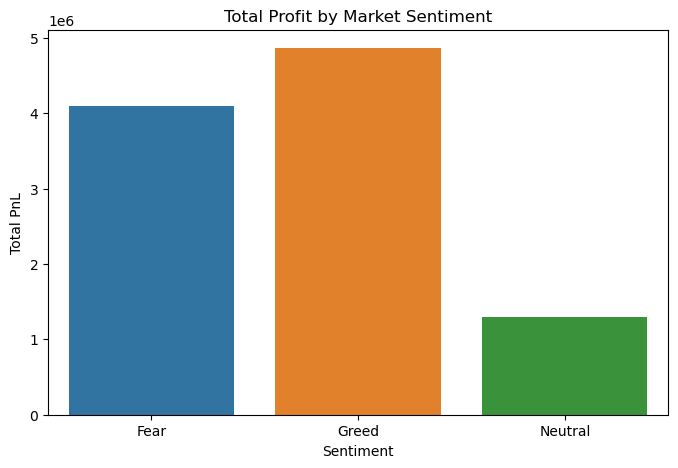

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_performance, x='sentiment_group', y='total_pnl')
plt.title("Total Profit by Market Sentiment")
plt.ylabel("Total PnL")
plt.xlabel("Sentiment")

# Save image
plt.savefig("outputs/total_pnl_by_sentiment.png", bbox_inches='tight')
plt.show()

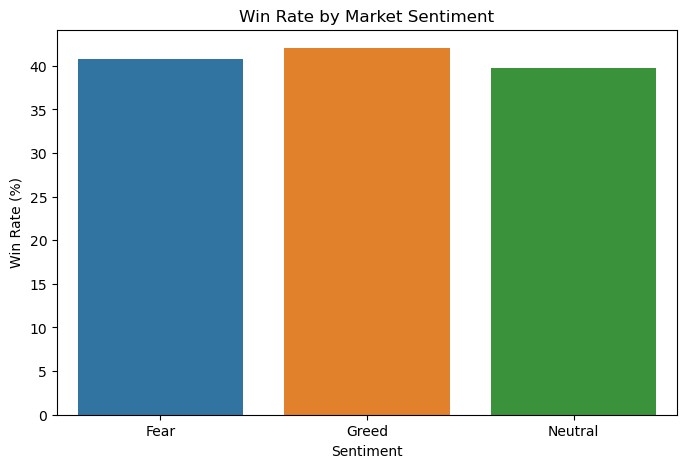

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_performance, x='sentiment_group', y='win_rate_percent')
plt.title("Win Rate by Market Sentiment")
plt.ylabel("Win Rate (%)")
plt.xlabel("Sentiment")

plt.savefig("outputs/winrate_by_sentiment.png", bbox_inches='tight')
plt.show()

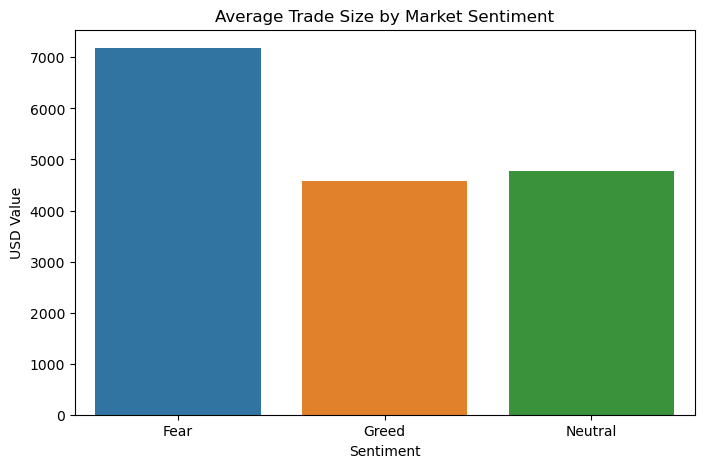

In [25]:
plt.figure(figsize=(8,5))
sns.barplot(data=sentiment_performance, x='sentiment_group', y='avg_trade_size')
plt.title("Average Trade Size by Market Sentiment")
plt.ylabel("USD Value")
plt.xlabel("Sentiment")

plt.savefig("outputs/avg_trade_size_by_sentiment.png", bbox_inches='tight')
plt.show()

In [26]:
trader_sentiment_perf = analysis_df.groupby(
    ['Account', 'sentiment_group']
).agg(
    total_trades=('Closed PnL', 'count'),
    total_pnl=('Closed PnL', 'sum'),
    avg_pnl=('Closed PnL', 'mean'),
    win_rate=('is_profit', 'mean'),
    avg_trade_size=('Size USD', 'mean')
).reset_index()

trader_sentiment_perf.head()

,Account,sentiment_group,total_trades,total_pnl,avg_pnl,win_rate,avg_trade_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1878,1.238143e+06,659.287949,0.518104,16916.688365
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,1519,2.364369e+05,155.653018,0.102041,13234.263667
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,421,1.256501e+05,298.456334,0.581948,23336.999311
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,2792,-5.893890e+03,-2.110992,0.467407,1053.107160
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,3768,6.571229e+04,17.439568,0.440021,2125.939583


In [27]:
trader_sentiment_perf['win_rate_percent'] = trader_sentiment_perf['win_rate'] * 100
trader_sentiment_perf.head()

,Account,sentiment_group,total_trades,total_pnl,avg_pnl,win_rate,avg_trade_size,win_rate_percent
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1878,1.238143e+06,659.287949,0.518104,16916.688365,51.810437
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,1519,2.364369e+05,155.653018,0.102041,13234.263667,10.204082
2,0x083384f897ee0f19899168e3b1bec365f52a9012,Neutral,421,1.256501e+05,298.456334,0.581948,23336.999311,58.194774
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Fear,2792,-5.893890e+03,-2.110992,0.467407,1053.107160,46.740688
4,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,Greed,3768,6.571229e+04,17.439568,0.440021,2125.939583,44.002123


In [28]:
top_greed_traders = trader_sentiment_perf[
    trader_sentiment_perf['sentiment_group'] == 'Greed'
].sort_values(by='total_pnl', ascending=False).head(10)

top_greed_traders

,Account,sentiment_group,total_trades,total_pnl,avg_pnl,win_rate,avg_trade_size,win_rate_percent
81,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Greed,7532,1.639363e+06,217.653093,0.324881,5502.724389,32.488051
92,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,Greed,14061,7.222110e+05,51.362704,0.527630,2427.245170,52.762961
46,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,Greed,691,4.535953e+05,656.433167,0.272069,9928.857410,27.206946
28,0x430f09841d65beb3f27765503d0f850b8bce7713,Greed,787,3.519654e+05,447.224194,0.644219,1650.759199,64.421855
52,0x75f7eeb85dc639d5e99c78f95393aa9a5f1170d4,Greed,6449,3.066642e+05,47.552217,0.835633,2897.795917,83.563343
1,0x083384f897ee0f19899168e3b1bec365f52a9012,Greed,1519,2.364369e+05,155.653018,0.102041,13234.263667,10.204082
37,0x4f93fead39b70a1824f981a54d4e55b278e9f760,Greed,4780,2.082412e+05,43.565096,0.338494,16853.717506,33.849372
40,0x513b8629fe877bb581bf244e326a047b249c4ff1,Greed,3392,1.630477e+05,48.068297,0.351710,36181.200245,35.170991
10,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,Greed,10451,1.392026e+05,13.319544,0.445603,456.085248,44.560329
67,0x92f17e8d81a944691c10e753af1b1baae1a2cd0d,Greed,2748,1.237745e+05,45.041676,0.304949,3056.509141,30.494905


In [29]:
top_fear_traders = trader_sentiment_perf[
    trader_sentiment_perf['sentiment_group'] == 'Fear'
].sort_values(by='total_pnl', ascending=False).head(10)

top_fear_traders

,Account,sentiment_group,total_trades,total_pnl,avg_pnl,win_rate,avg_trade_size,win_rate_percent
0,0x083384f897ee0f19899168e3b1bec365f52a9012,Fear,1878,1.238143e+06,659.287949,0.518104,16916.688365,51.810437
85,0xbaaaf6571ab7d571043ff1e313a9609a10637864,Fear,16917,8.827904e+05,52.183623,0.466809,3585.734802,46.680854
33,0x4acb90e786d897ecffb614dc822eb231b4ffb9f4,Fear,2382,4.634781e+05,194.575198,0.367758,12035.890978,36.775819
48,0x72c6a4624e1dffa724e6d00d64ceae698af892a0,Fear,652,3.434149e+05,526.709979,0.569018,1854.956304,56.901840
39,0x513b8629fe877bb581bf244e326a047b249c4ff1,Fear,6327,2.960444e+05,46.790643,0.366841,36103.028699,36.684052
88,0xbd5fead7180a9c139fa51a103cb6a2ce86ddb5c3,Fear,1568,2.745103e+05,175.070313,0.437500,9304.179292,43.750000
57,0x8170715b3b381dffb7062c0298972d4727a0a63b,Fear,1904,1.640062e+05,86.137724,0.295168,2618.921397,29.516807
24,0x420ab45e0bd8863569a5efbb9c05d91f40624641,Fear,159,1.091094e+05,686.222394,0.238994,4821.791950,23.899371
80,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,Fear,3744,1.027101e+05,27.433245,0.323985,1611.351213,32.398504
91,0xbee1707d6b44d4d52bfe19e41f8a828645437aab,Fear,17980,8.675289e+04,4.824966,0.386930,1487.126350,38.692992


In [30]:
top_greed_traders.to_csv(
    "csv_files/top_greed_traders.csv",
    index=False
)

top_fear_traders.to_csv(
    "csv_files/top_fear_traders.csv",
    index=False
)